In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import starspot as ss
import exoplanet as ex
import pandas as pd

In [2]:
def tessify(lc, sector=14, start_modifier=0):
    
    # get tess orbit timing
    tess_orbits = pd.read_csv('https://tess.mit.edu/wp-content/uploads/orbit_times_20201013_1338.csv',skiprows=5)
    sectors = tess_orbits['Sector']
    starts = tess_orbits['Start TJD']
    ends = tess_orbits['End TJD']
    
    start1 = starts[sectors==sector].iloc[0]
    end1 = ends[sectors==sector].iloc[0]
    start2 = starts[sectors==sector].iloc[1]
    end2 = ends[sectors==sector].iloc[1]
    span1 = end1-start1
    gap = start2-end1
    span2 = end2-start2
    
    keep = np.zeros(lc.time.value.shape, dtype=bool)

    # get cadence numbers for stop and start points
    try:
        newstart1 = 0 + start_modifier
        newend1 = np.where(np.isclose(lc.time.value,lc.time.value[0] + span1))[0][0] + start_modifier
        newstart2 = np.where(np.isclose(lc.time.value,lc.time.value[newend1] + gap))[0][0] + start_modifier
        newend2 = np.where(np.isclose(lc.time.value,lc.time.value[newstart2] + span2))[0][0] + start_modifier
    except IndexError:
        raise IndexError('Data selected is out of range. Try using a lower start_modifier')
    
    keep[newstart1:newend1+1] = True
    keep[newstart2:newend2+1] = True
    
    lc_new = lk.LightCurve()
    lc_new.time = lc.time.value[keep==True]
    lc_new.flux = lc.flux.value[keep==True]
    lc_new.flux_err = lc.flux_err.value[keep==True]
    
    return lc_new

In [3]:
rotators = pd.read_csv('M14rotators.csv')
control = pd.read_csv('M14nonrotators.csv')

kic_r = rotators['KIC']
p_r = rotators['Prot']
kic_c = control['KIC']

kep_cadence = 1/24/2 # 30min cadence
tess_cadence = 1/24/2 # 30min cadence

# ls_kep = np.zeros(len(kic_r))
# acf_kep = np.zeros(len(kic_r))
# ls_tess = np.zeros(len(kic_r))
# acf_tess = np.zeros(len(kic_r))

In [29]:
k = 1026146
# k = 892376
# k = 1026474

In [30]:
lc = lk.search_lightcurve(f'KIC {k}', quarter=9).download().remove_outliers()

In [31]:
pg = ex.lomb_scargle_estimator(lc.time.value, lc.flux.value, yerr=lc.flux_err.value, max_period=10)#, filter_period=15)

IndexError: arrays used as indices must be of integer (or boolean) type

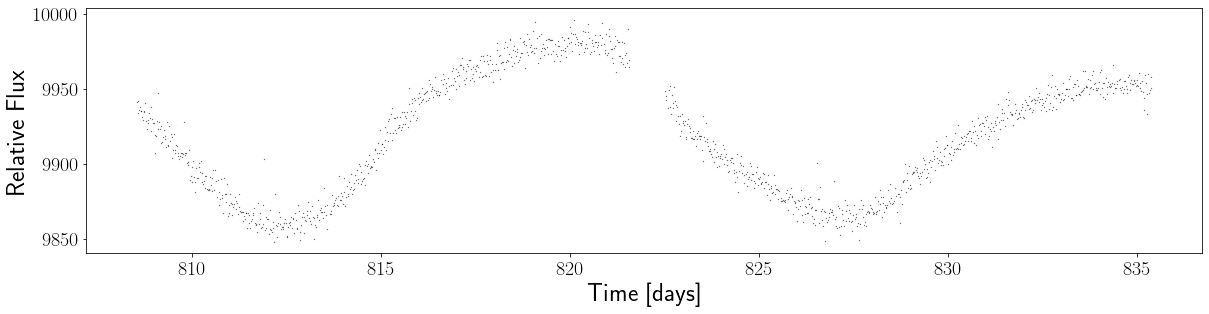

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import starspot as ss
df = pd.read_csv("kic1026146.csv")
star = ss.RotationModel(df.time.values, df.flux.values, df.flux_err.values)
star.lc_plot()
tess_cadence = 1./24./2.  # This is a TESS 2 minute cadence star.
acf_period = star.acf_rotation(tess_cadence)

In [6]:
lc = lk.search_lightcurve(f'KIC {k}', quarter=9).download().remove_outliers()
lc_tess = tessify(lc)

dict_r = {'flux':lc_tess.flux.value, 'time':lc_tess.time.value, 'flux_err':lc_tess.flux_err.value}
out_r = pd.DataFrame(data=dict_r)
out_r.to_csv(f'kic{k}.csv')

<AxesSubplot:xlabel='Time', ylabel='Flux'>

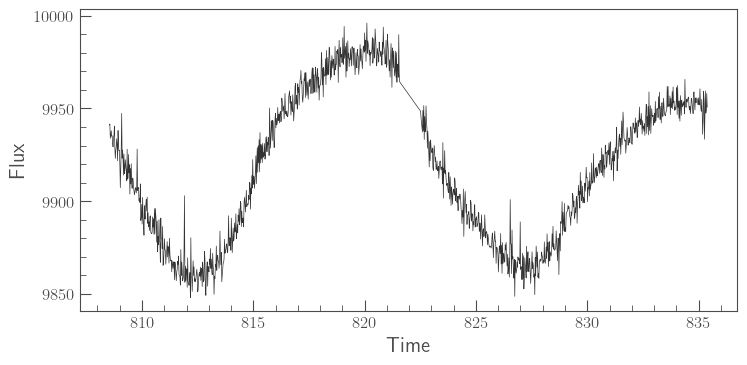

In [27]:
lc_tess.plot()

In [5]:
lc = lk.search_lightcurve(f'KIC {k}', quarter=9).download().remove_outliers()

rotate_kep = ss.RotationModel(lc.time.value, lc.flux.value, lc.flux_err.value)
ls_kep = rotate_kep.ls_rotation()
acf_kep = rotate_kep.acf_rotation(kep_cadence)

lc_tess = tessify(lc)
rotate_tess = ss.RotationModel(lc_tess.time.value, lc_tess.flux.value, lc_tess.flux_err.value)
ls_tess = rotate_tess.ls_rotation()
acf_tess = rotate_tess.acf_rotation(tess_cadence)

IndexError: arrays used as indices must be of integer (or boolean) type

In [24]:
print(ls_kep, acf_kep, ls_tess, acf_tess)

1.5637974761932911 1.5416666666666665 0.7827238593055448 0.125
